In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
movies = pd.read_csv("IMDB_Movies.csv")
OrgData = movies
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
movies.shape

(5043, 28)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
movies.isnull().sum(axis=0).sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [7]:
movies.isnull().sum(axis=1).sort_values(ascending = False )

279     15
4       13
4945    11
2241    11
2342    10
        ..
1703     0
1702     0
1701     0
1700     0
5042     0
Length: 5043, dtype: int64

In [8]:
movies.isnull().sum(axis = 0).sort_values(ascending=False)/len(movies)*100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_title                   0.000000
movie_imdb_link               0.000000
genres                   

In [10]:
round(movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies)*100,2)


gross                        17.53
budget                        9.76
aspect_ratio                  6.52
content_rating                6.01
plot_keywords                 3.03
title_year                    2.14
director_name                 2.06
director_facebook_likes       2.06
num_critic_for_reviews        0.99
actor_3_name                  0.46
actor_3_facebook_likes        0.46
num_user_for_reviews          0.40
color                         0.38
duration                      0.30
facenumber_in_poster          0.26
actor_2_name                  0.26
actor_2_facebook_likes        0.26
language                      0.24
actor_1_name                  0.14
actor_1_facebook_likes        0.14
country                       0.10
cast_total_facebook_likes     0.00
num_voted_users               0.00
movie_title                   0.00
movie_imdb_link               0.00
genres                        0.00
imdb_score                    0.00
movie_facebook_likes          0.00
dtype: float64

In [11]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)


gross                        17.53
budget                        9.76
aspect_ratio                  6.52
content_rating                6.01
plot_keywords                 3.03
title_year                    2.14
director_name                 2.06
director_facebook_likes       2.06
num_critic_for_reviews        0.99
actor_3_name                  0.46
actor_3_facebook_likes        0.46
num_user_for_reviews          0.40
color                         0.38
duration                      0.30
facenumber_in_poster          0.26
actor_2_name                  0.26
actor_2_facebook_likes        0.26
language                      0.24
actor_1_name                  0.14
actor_1_facebook_likes        0.14
country                       0.10
cast_total_facebook_likes     0.00
num_voted_users               0.00
movie_title                   0.00
movie_imdb_link               0.00
genres                        0.00
imdb_score                    0.00
movie_facebook_likes          0.00
dtype: float64

In [12]:
movies['budget']=movies['budget']/1000000
movies['gross']=movies['gross']/1000000

In [13]:
movies['profit']=movies['gross']-movies['budget']
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.505847
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.404152
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.074175,Action|Adventure|Thriller,...,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.925825
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.130642,Action|Thriller,...,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.130642
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,NaN
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,0.0014,2013.0,0.0,6.3,NaN,16,NaN
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,0.010443,Comedy|Drama|Romance,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN


In [14]:
movies.sort_values(by='profit',ascending=False)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237.00000,2009.0,936.0,7.9,1.78,33000,523.505847
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652.177271,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,150.00000,2015.0,2000.0,7.0,2.00,150000,502.177271
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658.672302,Drama|Romance,...,English,USA,PG-13,200.00000,1997.0,14000.0,7.7,2.35,26000,458.672302
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,11.00000,1977.0,1000.0,8.7,2.35,33000,449.935665
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434.949459,Family|Sci-Fi,...,English,USA,PG,10.50000,1982.0,725.0,7.9,1.85,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,English,USA,PG-13,0.00325,2005.0,44.0,7.8,NaN,4,NaN
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,NaN
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,0.00140,2013.0,0.0,6.3,NaN,16,NaN


In [15]:
movies.drop_duplicates(keep='first',inplace=True)


In [16]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.505847
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.404152
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.074175,Action|Adventure|Thriller,...,English,UK,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.925825
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.130642,Action|Thriller,...,English,USA,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.130642
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,NaN
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,English,USA,NaN,0.0014,2013.0,0.0,6.3,NaN,16,NaN
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,0.010443,Comedy|Drama|Romance,...,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN


In [17]:
IMDb_Top_250=movies[movies['num_voted_users']>25000].sort_values(by='imdb_score',ascending=False).head(250)
IMDb_Top_250

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28.341469,Crime|Drama,...,English,USA,R,25.0,1994.0,745.0,9.3,1.85,108000,3.341469
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134.821952,Crime|Drama,...,English,USA,R,6.0,1972.0,10000.0,9.2,1.85,43000,128.821952
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533.316061,Action|Crime|Drama|Thriller,...,English,USA,PG-13,185.0,2008.0,13000.0,9.0,2.35,37000,348.316061
3481,Color,NaN,54.0,53.0,NaN,1000.0,Adam Goldberg,4000.0,NaN,Crime|Drama|Thriller,...,English,USA,TV-MA,NaN,NaN,1000.0,9.0,1.78,61000,NaN
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57.300000,Crime|Drama,...,English,USA,R,13.0,1974.0,14000.0,9.0,1.85,14000,44.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Color,J.J. Abrams,518.0,127.0,14000.0,981.0,Leonard Nimoy,26000.0,257.704099,Action|Adventure|Sci-Fi,...,English,USA,PG-13,150.0,2009.0,12000.0,8.0,2.35,19000,107.704099
119,Color,Brad Bird,318.0,111.0,663.0,954.0,John Ratzenberger,1000.0,206.435493,Animation|Comedy|Family|Fantasy,...,English,USA,G,150.0,2007.0,1000.0,8.0,2.35,10000,56.435493
4144,Color,Walter Salles,71.0,113.0,179.0,11.0,Matheus Nachtergaele,119.0,5.595428,Drama,...,Portuguese,Brazil,R,2.9,1998.0,14.0,8.0,2.35,0,2.695428
4096,Color,Terrence Malick,112.0,94.0,0.0,180.0,Stuart Margolin,820.0,NaN,Drama|Romance,...,English,USA,PG,3.0,1978.0,350.0,8.0,1.85,0,NaN


In [18]:
Top_Foreign_Lang_Film = IMDb_Top_250[IMDb_Top_250['language']!='English']


In [19]:
top10director = movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)
top10director

director_name
John Blanchard      9.5
Mitchell Altieri    8.7
Sadyk Sher-Niyaz    8.7
Cary Bell           8.7
Mike Mayhall        8.6
Charles Chaplin     8.6
Ron Fricke          8.5
Damien Chazelle     8.5
Raja Menon          8.5
Majid Majidi        8.5
Name: imdb_score, dtype: float64

In [20]:
TempGenre=movies.genres.str.split('|',expand=True).iloc[:,0:2]
TempGenre.columns=['genre_1','genre_2']
TempGenre.genre_2.fillna(TempGenre.genre_1,inplace=True)
TempGenre

,genre_1,genre_2
0,Action,Adventure
1,Action,Adventure
2,Action,Adventure
3,Action,Thriller
4,Documentary,Documentary
...,...,...
5038,Comedy,Drama
5039,Crime,Drama
5040,Drama,Horror
5041,Comedy,Drama


In [21]:
movies_by_segment = movies = pd.concat([movies,TempGenre],axis=1)
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237.0000,2009.0,936.0,7.9,1.78,33000,523.505847,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309.404152,Action|Adventure|Fantasy,...,PG-13,300.0000,2007.0,5000.0,7.1,2.35,0,9.404152,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200.074175,Action|Adventure|Thriller,...,PG-13,245.0000,2015.0,393.0,6.8,2.35,85000,-44.925825,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448.130642,Action|Thriller,...,PG-13,250.0000,2012.0,23000.0,8.5,2.35,164000,198.130642,Action,Thriller
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,Documentary,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,NaN,NaN,2013.0,470.0,7.7,NaN,84,NaN,Comedy,Drama
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,TV-14,NaN,NaN,593.0,7.5,16.00,32000,NaN,Crime,Drama
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,NaN,0.0014,2013.0,0.0,6.3,NaN,16,NaN,Drama,Horror
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,0.010443,Comedy|Drama|Romance,...,PG-13,NaN,2012.0,719.0,6.3,2.35,660,NaN,Comedy,Drama


In [22]:
movies.groupby(['genre_1','genre_2']).gross.mean().sort_values(ascending=False).head(5)


genre_1    genre_2  
Family     Sci-Fi       434.949459
Adventure  Sci-Fi       228.627758
           Animation    117.050005
           Family       115.537542
Action     Adventure    108.752271
Name: gross, dtype: float64

In [23]:
Meryl_Streep = movies[movies['actor_1_name']=='Meryl Streep']
Leo_Caprio = movies[movies['actor_1_name']=='Leonardo DiCaprio']
Brad_Pitt = movies[movies['actor_1_name']=='Brad Pitt']
Shah_Rukh_Khan= movies[movies['actor_1_name']=='Shah Rukh Khan']


In [24]:
combined=Meryl_Streep.append([Leo_Caprio,Brad_Pitt])
combined=combined.append([Shah_Rukh_Khan])
combined


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.703470,Comedy|Drama|Romance,...,R,85.0000,2009.0,2000.0,6.6,1.85,0,27.703470,Comedy,Drama
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46.815748,Action|Adventure|Crime|Thriller,...,PG-13,45.0000,1994.0,894.0,6.3,2.35,0,1.815748,Action,Adventure
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.125426,Biography|Drama|Romance,...,PG-13,40.0000,2009.0,935.0,7.0,1.85,13000,54.125426,Biography,Drama
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.732962,Comedy|Drama|Romance,...,PG-13,35.0000,2006.0,11000.0,6.8,2.35,0,89.732962,Comedy,Drama
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14.998070,Drama|Thriller|War,...,R,35.0000,2007.0,10000.0,6.2,2.35,0,-20.001930,Drama,Thriller
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.100000,Biography|Drama|Romance,...,PG,31.0000,1985.0,920.0,7.2,1.85,0,56.100000,Biography,Drama
1618,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63.536011,Comedy|Drama|Romance,...,PG-13,30.0000,2012.0,7000.0,6.3,2.35,0,33.536011,Comedy,Drama
1674,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23.209440,Drama,...,R,30.0000,1998.0,882.0,7.0,1.85,592,-6.790560,Drama,Drama
1752,Color,Stephen Frears,87.0,110.0,350.0,83.0,Nina Arianda,11000.0,NaN,Biography|Comedy|Drama|Music|Romance,...,PG-13,29.0000,2016.0,183.0,7.1,2.35,0,NaN,Biography,Comedy
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.597830,Drama|Romance,...,PG-13,25.0000,2002.0,577.0,7.6,1.85,0,16.597830,Drama,Romance


In [25]:
combined

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.703470,Comedy|Drama|Romance,...,R,85.0000,2009.0,2000.0,6.6,1.85,0,27.703470,Comedy,Drama
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46.815748,Action|Adventure|Crime|Thriller,...,PG-13,45.0000,1994.0,894.0,6.3,2.35,0,1.815748,Action,Adventure
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.125426,Biography|Drama|Romance,...,PG-13,40.0000,2009.0,935.0,7.0,1.85,13000,54.125426,Biography,Drama
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.732962,Comedy|Drama|Romance,...,PG-13,35.0000,2006.0,11000.0,6.8,2.35,0,89.732962,Comedy,Drama
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14.998070,Drama|Thriller|War,...,R,35.0000,2007.0,10000.0,6.2,2.35,0,-20.001930,Drama,Thriller
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.100000,Biography|Drama|Romance,...,PG,31.0000,1985.0,920.0,7.2,1.85,0,56.100000,Biography,Drama
1618,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63.536011,Comedy|Drama|Romance,...,PG-13,30.0000,2012.0,7000.0,6.3,2.35,0,33.536011,Comedy,Drama
1674,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23.209440,Drama,...,R,30.0000,1998.0,882.0,7.0,1.85,592,-6.790560,Drama,Drama
1752,Color,Stephen Frears,87.0,110.0,350.0,83.0,Nina Arianda,11000.0,NaN,Biography|Comedy|Drama|Music|Romance,...,PG-13,29.0000,2016.0,183.0,7.1,2.35,0,NaN,Biography,Comedy
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.597830,Drama|Romance,...,PG-13,25.0000,2002.0,577.0,7.6,1.85,0,16.597830,Drama,Romance


In [26]:
combined.num_user_for_reviews = combined.num_user_for_reviews.astype('int')
combined.num_user_for_reviews


410      214
1106      69
1204     277
1408     631
1483     298
1575     200
1618     178
1674     112
1752      32
1925     660
2781     350
3135     280
3641      44
26      2528
50       753
97      2803
179     1188
257      799
296     1193
307      657
308     1138
326     1166
361     2054
452      964
641      263
911      667
990      548
1114     414
1422     244
1453     279
1560     216
2067      71
2757     506
3476     753
101      822
147     1694
254      627
255      798
382      361
400      845
470      701
611      119
683     2968
792       91
940      406
1490     975
1722     415
2204     908
2333      61
2682     369
2898     460
4749      24
3075     264
3276     286
3344     235
3510     119
Name: num_user_for_reviews, dtype: int64

In [27]:
combined.groupby('actor_1_name').num_critic_for_reviews.mean()


actor_1_name
Brad Pitt            231.944444
Leonardo DiCaprio    330.190476
Meryl Streep         163.153846
Shah Rukh Khan        77.250000
Name: num_critic_for_reviews, dtype: float64

In [28]:
combined


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,genre_1,genre_2
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112.703470,Comedy|Drama|Romance,...,R,85.0000,2009.0,2000.0,6.6,1.85,0,27.703470,Comedy,Drama
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46.815748,Action|Adventure|Crime|Thriller,...,PG-13,45.0000,1994.0,894.0,6.3,2.35,0,1.815748,Action,Adventure
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94.125426,Biography|Drama|Romance,...,PG-13,40.0000,2009.0,935.0,7.0,1.85,13000,54.125426,Biography,Drama
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124.732962,Comedy|Drama|Romance,...,PG-13,35.0000,2006.0,11000.0,6.8,2.35,0,89.732962,Comedy,Drama
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14.998070,Drama|Thriller|War,...,R,35.0000,2007.0,10000.0,6.2,2.35,0,-20.001930,Drama,Thriller
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87.100000,Biography|Drama|Romance,...,PG,31.0000,1985.0,920.0,7.2,1.85,0,56.100000,Biography,Drama
1618,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63.536011,Comedy|Drama|Romance,...,PG-13,30.0000,2012.0,7000.0,6.3,2.35,0,33.536011,Comedy,Drama
1674,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23.209440,Drama,...,R,30.0000,1998.0,882.0,7.0,1.85,592,-6.790560,Drama,Drama
1752,Color,Stephen Frears,87.0,110.0,350.0,83.0,Nina Arianda,11000.0,NaN,Biography|Comedy|Drama|Music|Romance,...,PG-13,29.0000,2016.0,183.0,7.1,2.35,0,NaN,Biography,Comedy
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41.597830,Drama|Romance,...,PG-13,25.0000,2002.0,577.0,7.6,1.85,0,16.597830,Drama,Romance


In [29]:
combined.groupby('actor_1_name').num_user_for_reviews.mean()


actor_1_name
Brad Pitt            702.444444
Leonardo DiCaprio    914.476190
Meryl Streep         257.307692
Shah Rukh Khan       226.000000
Name: num_user_for_reviews, dtype: float64

In [30]:
combined.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()


,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,231.944444,702.444444
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,163.153846,257.307692
Shah Rukh Khan,77.250000,226.000000


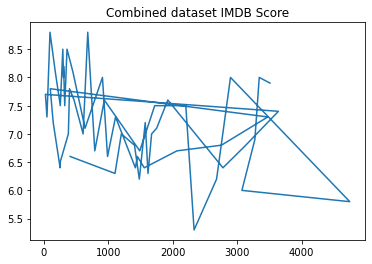

In [31]:
plt.title('Combined dataset IMDB Score')
plt.plot(combined.imdb_score);


In [32]:
import seaborn as sns


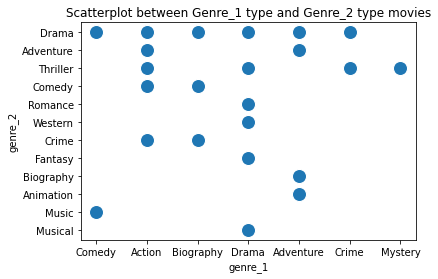

In [33]:
plt.title("Scatterplot between Genre_1 type and Genre_2 type movies");
sns.scatterplot(x=combined.genre_1,y=combined.genre_2,s=200);

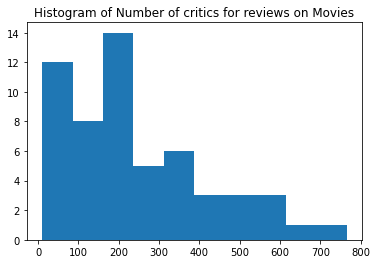

In [34]:
plt.title("Histogram of Number of critics for reviews on Movies")
plt.hist(combined.num_critic_for_reviews);


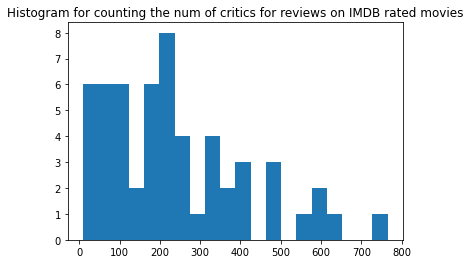

In [35]:
plt.title("Histogram for counting the num of critics for reviews on IMDB rated movies");
plt.hist(combined.num_critic_for_reviews,bins=20);

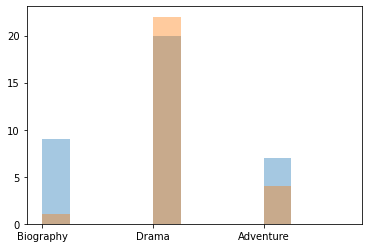

In [37]:
plt.hist(combined.genre_1, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(combined.genre_2, alpha=0.4, bins=np.arange(2, 5, 0.25));

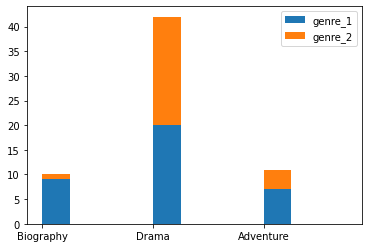

In [38]:
plt.hist([combined.genre_1, combined.genre_2], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);
plt.legend(['genre_1','genre_2']);